In [1]:
import json
import numpy as np

from IPython.display import display, Markdown, Latex
import pandas as pd
import os

import copy
import json
import logging
import numpy as np
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize
import time


from src.experiments.aux_code import *
from datasets.get_datasets import *
from src.brkga.genetic import genetic as brkga
from src.brkga_variation.genetic import genetic as brkga_var
from src.s_genetic.genetic import *
from src.predicate import *

In [8]:
def get_train_test(directory):
#     directories = [x[0] for x in os.walk(f'{directory}')]
    test = []
    train = []
    _time = []
    for x in range(0, 3):
#         for y in range(1, 4):
        directories = [x[0] for x in os.walk(f'{directory}/train_fold_{x}')]
        with open(f'{directories[1]}/round_1/individual_1/test.txt', 'r') as f:
            aa = []
            for i in f.readlines():
                aa.append(json.loads(i.replace('\n', '')))
        test.append(aa)
        with open(f'{directories[1]}/round_1/individual_1/train.txt', 'r') as f:
            tt = f.readlines()
            train.append(json.loads(tt[1].replace('\n', '')))
            _time.append(round(json.loads(tt[2].replace('\n', ''))))
    return {'AUC PR': [x['AUC PR'] for y in test for x in y], 'AUC ROC':[x['AUC ROC'] for y in test for x in y], "CLL":[x['CLL'] for y in test for x in y]},  {'AUC PR': [[[y['m_auc_pr'] for y in x ] for x in train],[[y['s_auc_pr'] for y in x ] for x in train]], 'AUC ROC': [[[y['m_auc_roc'] for y in x ] for x in train], [[y['s_auc_roc'] for y in x ] for x in train]], 'CLL': [[[y['m_cll'] for y in x ] for x in train], [[y['s_cll'] for y in x ] for x in train]]},_time


In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter


def get_plot(data, metric, metric_name, name_fig):
    plt.tight_layout()
    fig, ax = plt.subplots()
    types = ['^-', 'o', '+', '--', '-.']
    for i in range(0, len(data[metric][0])):
        ax.errorbar(list(range(len(data[metric][0][i]))), data[metric][0][i], yerr=data[metric][1][i], fmt=types[i], linestyle=':', color='k', label=f'fold_{i}')
        
    ax.set(xlabel='generations', ylabel=metric_name,
           title=f'{metric_name} over the generations')
    ax.yaxis.set_major_formatter(FormatStrFormatter('%0.4f'))
    ax.grid(linestyle = ':')
    ax.legend(loc='lower right', fontsize='small', frameon=True)
    plt.savefig(name_fig, bbox_inches="tight")
    plt.show()

<Figure size 432x288 with 0 Axes>

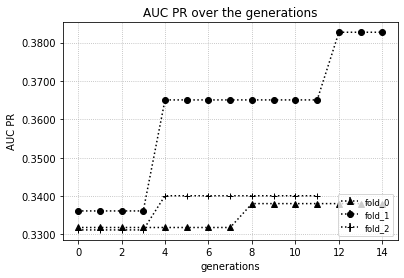

<Figure size 432x288 with 0 Axes>

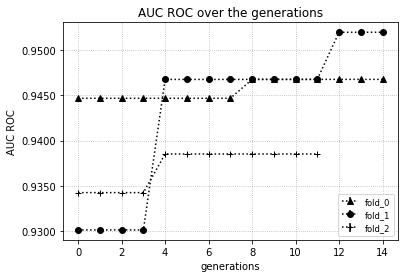

<Figure size 432x288 with 0 Axes>

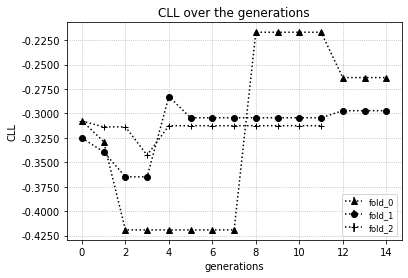

<Figure size 432x288 with 0 Axes>

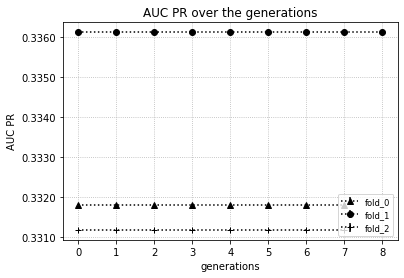

<Figure size 432x288 with 0 Axes>

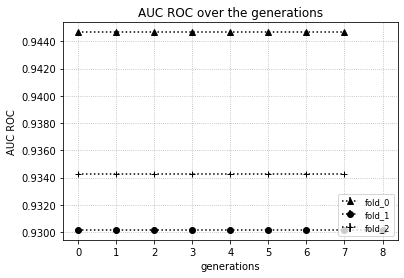

<Figure size 432x288 with 0 Axes>

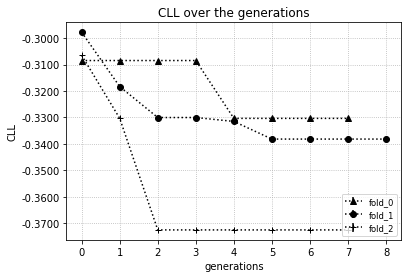

<Figure size 432x288 with 0 Axes>

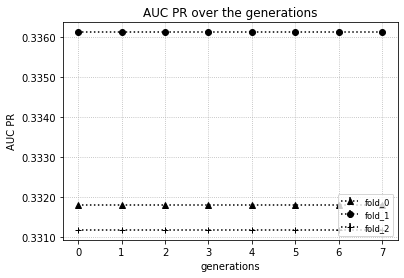

<Figure size 432x288 with 0 Axes>

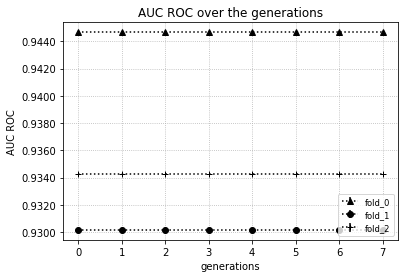

<Figure size 432x288 with 0 Axes>

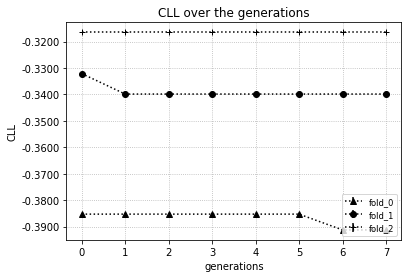

,Experiment,Fold,AUC PR,AUC ROC,CLL,time
0,imdb_uwcse_s_genetic,1,0.341 +/- 0.009,0.941 +/- 0.005,-0.249 +/- 0.042,1251.000 +/- 227.346
1,imdb_uwcse_brkga,1,0.333 +/- 0.002,0.936 +/- 0.006,-0.275 +/- 0.035,494.667 +/- 27.956
2,imdb_uwcse_brkga_var,1,0.333 +/- 0.002,0.936 +/- 0.006,-0.265 +/- 0.032,475.667 +/- 90.768


In [14]:
types_genetic = ['s_genetic', 'brkga', 'brkga_var']
source = 'imdb'
target = 'uwcse'
pred_source = 'workedunder'
pred_target = 'advisedby'
table = []
table_train = []
metrics = ['AUC PR', 'AUC ROC', 'CLL']
for type_genetic in types_genetic:
#     for fold_number in range(0, 3):
#         print("FOLD: ", fold_number)
    directories = [x[0] for x in os.walk(f'groot_experiments/{source}_{target}_{pred_source}_{pred_target}/{type_genetic}')]
    test, train, _time = get_train_test(f'groot_experiments/{source}_{target}_{pred_source}_{pred_target}/{type_genetic}')

    try:
        os.mkdir(f'{directories[2]}/images/')
    except:
        pass
    for metric in metrics:
        get_plot(train, metric, metric, f'{directories[2]}/images/{metric}')


    table.append([f'imdb_uwcse_{type_genetic}',
                  f'{directories[2].split("train_fold_")[1].split("/")[0]}',
                 '%.3f +/- %.3f' % (np.mean(test['AUC PR']), np.std(test['AUC PR'])),
                 '%.3f +/- %.3f' % (np.mean(test['AUC ROC']), np.std(test['AUC ROC'])),
                 '%.3f +/- %.3f' % (np.mean(test['CLL']), np.std(test['CLL'])),
                 '%.3f +/- %.3f' % (np.mean(_time), np.std(_time))])
    
display(pd.DataFrame(table, columns=['Experiment', 'Fold', 'AUC PR', 'AUC ROC', 'CLL', 'time']))

In [15]:
types_genetic = ['s_genetic', 'brkga', 'brkga_var']
source = 'imdb'
target = 'cora'
pred_source = 'workedunder'
pred_target = 'samevenue'
table = []
table_train = []
metrics = ['AUC PR', 'AUC ROC', 'CLL']
for type_genetic in types_genetic:
#     for fold_number in range(0, 3):
#         print("FOLD: ", fold_number)
    directories = [x[0] for x in os.walk(f'groot_experiments/{source}_{target}_{pred_source}_{pred_target}/{type_genetic}')]
    test, train, _time = get_train_test(f'groot_experiments/{source}_{target}_{pred_source}_{pred_target}/{type_genetic}')

    try:
        os.mkdir(f'{directories[2]}/images/')
    except:
        pass
    for metric in metrics:
        get_plot(train, metric, metric, f'{directories[2]}/images/{metric}')


    table.append([f'imdb_uwcse_{type_genetic}',
                  f'{directories[2].split("train_fold_")[1].split("/")[0]}',
                 '%.3f +/- %.3f' % (np.mean(test['AUC PR']), np.std(test['AUC PR'])),
                 '%.3f +/- %.3f' % (np.mean(test['AUC ROC']), np.std(test['AUC ROC'])),
                 '%.3f +/- %.3f' % (np.mean(test['CLL']), np.std(test['CLL'])),
                 '%.3f +/- %.3f' % (np.mean(_time), np.std(_time))])
    
display(pd.DataFrame(table, columns=['Experiment', 'Fold', 'AUC PR', 'AUC ROC', 'CLL', 'time']))

FileNotFoundError: [Errno 2] No such file or directory: 'groot_experiments/imdb_cora_workedunder_samevenue/s_genetic/train_fold_0/0.9_0.35_30_15/round_1/individual_1/test.txt'

In [218]:
directories = [x[0] for x in os.walk(f'groot_experiments/imdb_uwcse_workedunder_advisedby/brkga_var/')]

inf_var = []
with open(f'{directories[5]}/inf.txt', 'r') as f:
    inf_var = json.loads(f.readline())

directories = [x[0] for x in os.walk(f'groot_experiments/imdb_uwcse_workedunder_advisedby/brkga/')]

inf_brkga = []
with open(f'{directories[5]}/inf.txt', 'r') as f:
    inf_brkga = json.loads(f.readline())
    
directories = [x[0] for x in os.walk(f'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/')]

inf_gen = []
with open(f'{directories[5]}/inf.txt', 'r') as f:
    inf_gen = json.loads(f.readline())
    
infs = [inf_var, inf_brkga, inf_gen]

preds = []

for i in infs:
    res = []
    for j in i:
        res.append(' '.join(j.split(' ')[:2]))
    preds.append(res)
commom = list(set(preds[0]) & set(preds[1]) & set(preds[2]))

1360 38
1360 38
1360 38


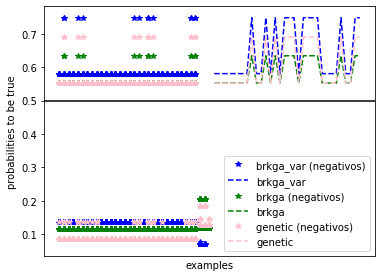

In [224]:
infs = [inf_var, inf_brkga, inf_gen]
colors = ['blue', 'green', 'pink']

for j in range(0, len(infs)):

    x = []
    y = []
    x_pos = []
    y_pos = []

    for i in infs[j]:
        if ' '.join(i.split(' ')[:2]) in commom:
            if "!" in i.split(' ')[0]:
                x.append(i.split(' ')[0])
                y.append(1.0 - float(i.split(' ')[2]))
            else:
                x_pos.append(i.split(' ')[0])
                y_pos.append(float(i.split(' ')[2]))
    print(len(x), len(x_pos))
    if j == 0:
#         plt.legend('brkga_var')
        plt.plot(x, y,  '*',color=colors[j], label='brkga_var (negativos)')
        plt.plot(x_pos, y_pos, '--', color=colors[j],  label='brkga_var')
    elif j == 1:
#         plt.legend('brkga')
        plt.plot(x, y,  '*',color=colors[j], label='brkga (negativos)')
        plt.plot(x_pos, y_pos, '--', color=colors[j],  label='brkga')
    else:
#         plt.legend('s_genetic')
        plt.plot(x, y,  '*',color=colors[j], label='genetic (negativos)')
        plt.plot(x_pos, y_pos, '--', color=colors[j], label='genetic')
    
    
plt.tight_layout()    
# plt.ylim(0.0, 1.0)
plt.axhline(y=0.5, color="black", linestyle="-")
plt.xticks([])
# plt.yticks([])
plt.xlabel('examples')
plt.ylabel('probabilities to be true')
plt.legend()

plt.show()

166635 2011
166635 2011
166635 2011


/Users/leticia.figueiredo/opt/anaconda3/envs/groot/lib/python3.6/site-packages/ipykernel_launcher.py:52: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


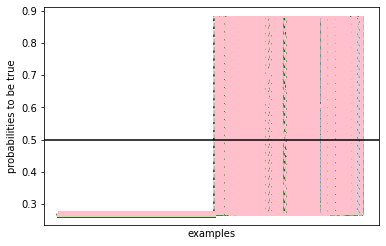

In [210]:
directories = [x[0] for x in os.walk(f'groot_experiments/imdb_cora_workedunder_samevenue/brkga_var/')]

inf_var = []
with open(f'{directories[5]}/inf.txt', 'r') as f:
    inf_var = json.loads(f.readline())

directories = [x[0] for x in os.walk(f'groot_experiments/imdb_cora_workedunder_samevenue/brkga/')]

inf_brkga = []
with open(f'{directories[5]}/inf.txt', 'r') as f:
    inf_brkga = json.loads(f.readline())
    
directories = [x[0] for x in os.walk(f'groot_experiments/imdb_cora_workedunder_samevenue/s_genetic/')]

inf_gen = []
with open(f'{directories[5]}/inf.txt', 'r') as f:
    inf_gen = json.loads(f.readline())
    
infs = [inf_var, inf_brkga, inf_gen]

preds = []

for i in infs:
    res = []
    for j in i:
        res.append(' '.join(j.split(' ')[:2]))
    preds.append(res)
commom = list(set(preds[0]) & set(preds[1]) & set(preds[2]))

infs = [inf_var, inf_brkga, inf_gen]
colors = ['blue', 'green', 'pink']

for j in range(0, len(infs)):

    x = []
    y = []
    x_pos = []
    y_pos = []

    for i in infs[j]:
        if ' '.join(i.split(' ')[:2]) in commom:
            if "!" in i.split(' ')[0]:
                x.append(i.split(' ')[0])
                y.append(1.0 - float(i.split(' ')[2]))
            else:
                x_pos.append(i.split(' ')[0])
                y_pos.append(float(i.split(' ')[2]))
    print(len(x), len(x_pos))
    plt.plot(x, y,  '*',color=colors[j])
    plt.plot(x_pos, y_pos, '--', color=colors[j])
    
plt.tight_layout()    
# plt.ylim(0.0, 1.0)
plt.axhline(y=0.5, color="black", linestyle="-")
plt.xticks([])
# plt.yticks([])
plt.xlabel('examples')
plt.ylabel('probabilities to be true')

plt.show()

In [168]:
import copy
ss = []
with open('src/experiments/structures.json', 'r') as f:
    ss = json.loads(f.readline())
    
src_struct = copy.deepcopy(ss['imdb'])
new_src_struct = []
for i in range(0, len(src_struct)):
    new_src_struct.append(define_individual(src_struct[i], i))  
structured_src = src_struct

refine_original = copy.deepcopy(new_src_struct)

In [198]:
def get_refine(directory):
    directories = [x[0] for x in os.walk(f'{directory}')]
    res = []
    for x in range(1, 6):
        for y in range(1, 4):
            refine = []
            with open(f'{directories[2]}/round_{x}/individual_{y}/refine.txt', 'r') as f:
                refine = json.loads(f.readline())
                
            refine_gen = []

            for i in range(0, 10):
                tree = []
                for j in refine:
                    if int(j.split(';')[0]) == i:
                        tree.append(j)
                refine_gen.append(tree)
            qtd_preds = 0
            for i in range(0, 10):
                original_tree = refine_gen[i]
                for j in range(0, len(original_tree)):
                    qtd_preds += len(original_tree[j].split(';')[2].split('), '))
            res.append(qtd_preds)
            
    return res


In [209]:
table = []
experiments = ['imdb_uwcse_workedunder_advisedby', 'imdb_cora_workedunder_samevenue']
types_genetic = ['s_genetic', 'brkga', 'brkga_var']

for experiment in experiments:
    table = []

    for type_gen in types_genetic:

        res = get_refine(f'groot_experiments/{experiment}/{type_gen}/')
        table.append([f'{experiment}_{type_gen}',
                     '%.3f +/- %.3f' % (np.mean(res), np.std(res)),
                     '%.1f' % (qtd_preds_original),
                     '%.3f' % (np.mean(res)/qtd_preds_original)])

    display(pd.DataFrame(table, columns=['Experiment', 'Refine final', 'Refine original', '%']))

,Experiment,Refine final,Refine original,%
0,imdb_uwcse_workedunder_advisedby_s_genetic,44.867 +/- 3.180,40.0,1.122
1,imdb_uwcse_workedunder_advisedby_brkga,40.000 +/- 0.000,40.0,1.000
2,imdb_uwcse_workedunder_advisedby_brkga_var,40.133 +/- 0.340,40.0,1.003


,Experiment,Refine final,Refine original,%
0,imdb_cora_workedunder_samevenue_s_genetic,40.000 +/- 0.000,40.0,1.000
1,imdb_cora_workedunder_samevenue_brkga,40.000 +/- 0.000,40.0,1.000
2,imdb_cora_workedunder_samevenue_brkga_var,40.000 +/- 0.000,40.0,1.000


In [190]:


directories = [x[0] for x in os.walk(f'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/')]

ref_gen = []
with open(f'{directories[7]}/refine.txt', 'r') as f:
    ref_gen = json.loads(f.readline())

In [189]:
directories

['groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/',
 'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/train_fold_2',
 'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/train_fold_2/0.75_0.35_30_15',
 'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/train_fold_2/0.75_0.35_30_15/images',
 'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/train_fold_2/0.75_0.35_30_15/round_1',
 'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/train_fold_2/0.75_0.35_30_15/round_1/individual_1',
 'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/train_fold_2/0.75_0.35_30_15/round_1/individual_3',
 'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/train_fold_2/0.75_0.35_30_15/round_1/individual_2',
 'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/train_fold_2/0.75_0.35_30_15/round_4',
 'groot_experiments/imdb_uwcse_workedunder_advisedby/s_genetic/train_fold_2/0.75_0.35_30_15/round_4/individual_1

In [191]:
refine_gen = []

for i in range(0, 10):
    tree = []
    for j in ref_gen:
        if int(j.split(';')[0]) == i:
            tree.append(j)
    refine_gen.append(tree)
  

In [192]:
qtd_preds = 0
qtd_preds_original = 0
for i in range(0, 10):
    original_tree = refine_original[i]
    
    for j in range(0, len(original_tree)):
        qtd_preds_original += len(original_tree[j].split(';')[2].split('), '))
        
for i in range(0, 10):
    original_tree = refine_gen[i]
    
    for j in range(0, len(original_tree)):
        qtd_preds += len(original_tree[j].split(';')[2].split('), '))

In [193]:
qtd_preds, qtd_preds_original

(42, 40)

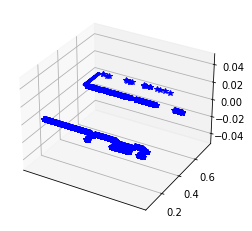

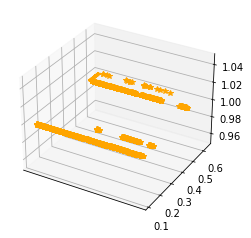

In [98]:
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


for j in range(0, len(infs)):

    x = []
    y = []
    x_pos = []
    y_pos = []
    pl.figure()
    ax = pl.subplot(projection='3d')
    aa = 0
    for i in infs[j]:
        if "!" in i.split(' ')[0]:
#             x.append(i.split(' ')[0])
            x.append(aa)
            y.append(1.0 - float(i.split(' ')[2]))
        else:
#             x_pos.append(i.split(' ')[0])
            x_pos.append(aa)
            y_pos.append(float(i.split(' ')[2]))
        aa += 1
    z = [int(j)]*len(x)
    z1 = [int(j)]*len(x_pos)
    ax.plot(x, y, z, '*', color=colors[j])
    ax.plot(x_pos, y_pos, z1, '--', color=colors[j])

    ax.set_xticks([])

# x   = np.linspace(1,5,100)
# y1  = np.ones(x.size)
# y2  = np.ones(x.size)*2
# y3  = np.ones(x.size)*3
# z   = np.sin(x/2)

# pl.figure()
# ax = pl.subplot(projection='3d')
# ax.plot(x, y1, z, color='r')
# ax.plot(x, y2, z, color='g')
# ax.plot(x, y3, z, color='b')

# ax.add_collection3d(pl.fill_between(x, 0.95*z, 1.05*z, color='r', alpha=0.3), zs=1, zdir='y')
# ax.add_collection3d(pl.fill_between(x, 0.90*z, 1.10*z, color='g', alpha=0.3), zs=2, zdir='y')
# ax.add_collection3d(pl.fill_between(x, 0.85*z, 1.15*z, color='b', alpha=0.3), zs=3, zdir='y')

# ax.set_xlabel('Day')
# ax.set_zlabel('Resistance (%)')

In [68]:
inf_brkga

[]

In [228]:
from time import time
start_time = time()
print(round(time()-start_time))

0
